Imports for model cnn with 12 layers 

In [ ]:

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.layers import  PReLU
from keras.layers.convolutional import ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import AveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/images_new.zip



In [ ]:

"""
This file contains project global parameters.


"""
import os
from PIL import ImageFont

# W = Space
# X = Del
# Y = None
classes = 'A B C D E F G H I J K L M N O P Q R S T U V W X Y'.split()

alphaBet = "א ב ג ד ה ו ז ח ט י כ ל מ נ ס ע פ צ ק ר ש ת".split()  # use this and not 'א'+index since includes finals.
alphaBet.append(' ')  # append space to be at the last index.
# finals: ך ם ן ף ץ
# Define a dictionary that maps Hebrew alphabet characters to their English counterparts

modelPath = '/content/cnn12_model.h5'
modelWeights = '/content/drive/MyDrive/trainWeights.h5'


# Image Dimension
imgDim = 128

# HyperParams
nbatch = 128  # 32 default. Number of samples to propagate each epoch.
learnRate = 0.001

# Dataset folders
trainFolder = '/content/images/train/'
validFolder = '/content/images/validation/'
testFolder = '/content/images/test/'

# Log folder to save weights and training graphs.
logFolder = "/content/Temp"
try:
    os.makedirs(logFolder)
except OSError:
    pass


In [ ]:
def add_block(block_index, model):
    """
    Adds a block of convolutional layers to the given model.

    :param block_index: the index of the block to add.
    :param model: the model to add the block to.
    :return: the updated model.
    """
    # Add first convolutional layer
    model.add(Conv2D(32 * block_index, (3, 3), input_shape=(imgDim, imgDim, 1)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    # Add second convolutional layer
    model.add(Conv2D(32 * block_index, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    return model
    
def add_last_block(model):
    """
    Adds the last block of convolutional layers and fully connected layers to the given model.

    :param model: the model to add the block to.
    :return: the updated model.
    """
    # Add first convolutional layer
    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    # Add second convolutional layer
    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    # Add average pooling layer
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add first fully connected layer
    model.add(Dense(2048, activation='relu'))
    #change dropout regularization precentage
    model.add(Dropout(0.3))

    # Add output layer
    model.add(Dense(len(classes), activation='softmax'))

    return model

In [ ]:
def getModel(weightsPath=None):
    """
    Build cnn12 model and load pre-trained weights if provided.

    :param weightsPath: pre-trained weights h5 file.
    :return: compiled cnn12 model.
    """
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(imgDim, imgDim, 1)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(32, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(64, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(128, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(256, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(512, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    # Dense = Fully connected layer
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(classes), activation='softmax'))

    # opt = SGD(lr=learnRate, decay=1e-6, momentum=0.9, nesterov=True)
    opt = Adam(lr=learnRate)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    if weightsPath:
        try:
            model.load_weights(weightsPath)
            print("cnn12 weights loaded.")
        except OSError:
            print("Failed loading cnn12 weights!")
    else:
        print("cnn12 weights are not provided.")

    return model

Train Model

In [ ]:
import keras
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:

# Training Params.
trainWeights = 'trainWeights.h5'  # weights to save
epochs = 35

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    """
    Custom callback class in order to save weights after each epoch.
    Was used to backup weights via Google colab Machine.
    """

    def on_epoch_end(self, epoch, logs=None):
        try:
            copyfile(trainWeights, "Temp/epoch" + str(epoch) + "_weights.h5")
        except OSError:
            pass
        return

In [ ]:
def trainModel():
    """
    Train the CNN12 model by Loading Training and Validation data.
    At the end of the training a learning graph will be plotted.
    """

    # Load training data with augmentation.
    train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                       # randomly rotate up to 40 degrees.
                                       rotation_range=10,
                                       # randomly shift range.
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       fill_mode="nearest")  # fill new pixels created by shift

    train_generator = train_datagen.flow_from_directory(trainFolder,
                                                        target_size=(
                                                            imgDim, imgDim),
                                                        color_mode='grayscale',
                                                        batch_size=nbatch,
                                                        classes=classes,
                                                        class_mode="categorical")

    # # Load validation data (10% of original train data).

    valid_datagen = ImageDataGenerator(rescale=1. / 255.)

    valid_generator = valid_datagen.flow_from_directory(validFolder,
                                                        target_size=(
                                                            imgDim, imgDim),
                                                        color_mode='grayscale',
                                                        batch_size=nbatch,
                                                        classes=classes,
                                                        class_mode="categorical")

    model = getModel(modelWeights)  # Build cnn12 model.
    model.save(modelPath)
    model.summary()

    step_size_train = train_generator.n // train_generator.batch_size
    step_size_test = valid_generator.n // valid_generator.batch_size

    csv_logger = CSVLogger(logFolder + '/training.csv')

    ccb = CustomCallback()
    callbacks_list = [
        ModelCheckpoint(filepath=trainWeights, monitor='val_acc'),
        ccb,
        csv_logger
    ]

    history = model.fit(
        train_generator,
        steps_per_epoch=step_size_train,
        epochs=epochs,
        validation_data=valid_generator,
        validation_steps=step_size_test,
        callbacks=callbacks_list)

    # save weights
    model.save_weights(trainWeights)

  # Plot train graphs
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    nepochs = len(history.history['loss'])
    plt.plot(range(nepochs), history.history['loss'], 'r-', label='train')
    plt.plot(range(nepochs),
             history.history['val_loss'], 'b-', label='validation')
    plt.legend(prop={'size': epochs})
    plt.ylabel('loss')
    plt.xlabel('# of epochs')
    plt.subplot(1, 2, 2)
    plt.plot(range(nepochs), history.history['acc'], 'r-', label='train')
    plt.plot(range(nepochs),
             history.history['val_acc'], 'b-', label='validation')
    plt.legend(prop={'size': epochs})
    plt.ylabel('accuracy')
    plt.xlabel('# of epochs')
    plt.savefig(logFolder + '/graph.png')


In [ ]:
    trainModel()


Found 121129 images belonging to 25 classes.
Found 13435 images belonging to 25 classes.
Failed loading cnn12 weights!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 zero_padding2d_12 (ZeroPadd  (None, 128, 128, 32)     0         
 ing2D)                                                          
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 p_re_lu_12 (PReLU)          (None, 128, 128, 32)      524288    
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      9248      
 

946/946 [==============================] - 470s 494ms/step - loss: 1.1915 - accuracy: 0.6159 - val_loss: 0.7295 - val_accuracy: 0.7834
Epoch 2/35
946/946 [==============================] - 465s 491ms/step - loss: 0.1950 - accuracy: 0.9421 - val_loss: 0.1217 - val_accuracy: 0.9608
Epoch 3/35
946/946 [==============================] - 461s 487ms/step - loss: 0.1119 - accuracy: 0.9674 - val_loss: 0.2316 - val_accuracy: 0.9301
Epoch 4/35
946/946 [==============================] - 462s 488ms/step - loss: 0.0826 - accuracy: 0.9765 - val_loss: 4.4740 - val_accuracy: 0.2731
Epoch 5/35
946/946 [==============================] - 460s 486ms/step - loss: 0.0686 - accuracy: 0.9808 - val_loss: 0.8706 - val_accuracy: 0.7696
Epoch 6/35
946/946 [==============================] - 465s 491ms/step - loss: 0.0576 - accuracy: 0.9840 - val_loss: 0.0736 - val_accuracy: 0.9780
Epoch 7/35
946/946 [==============================] - 469s 495ms/step - loss: 0.0567 - accuracy: 0.9840 - val_loss: 0.6046 - val_accura

In [ ]:
 # Plot train graphs
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    nepochs = len(history.history['loss'])
    plt.plot(range(nepochs), history.history['loss'], 'r-', label='train')
    plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
    plt.legend(prop={'size': epochs})
    plt.ylabel('loss')
    plt.xlabel('# of epochs')
    plt.subplot(1, 2, 2)
    plt.plot(range(nepochs), history.history['acc'], 'r-', label='train')
    plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='validation')
    plt.legend(prop={'size': epochs})
    plt.ylabel('accuracy')
    plt.xlabel('# of epochs')
    plt.savefig(logFolder + '/graph.png')


Test the model

In [ ]:

import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Evaluation params
size = nbatch  # Maximum Test Batch size.


print("\nLoading Model and Weights..")
model = load_model(modelPath)
model.load_weights(modelWeights)

# Test Data (20%).
print("Loading test data..")
test_datagen = ImageDataGenerator(rescale=1. / 255.,
                                  rotation_range=10,  # randomly rotate up to 40 degrees.
                                  width_shift_range=0.2,  # randomly shift range.
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode="nearest")  # fill new pixels created by shift

test_generator = test_datagen.flow_from_directory(testFolder,
                                                  target_size=(imgDim, imgDim),
                                                  color_mode='grayscale',
                                                  batch_size=nbatch,
                                                  classes=classes,
                                                  class_mode="categorical")
count = 1
x_test, y_test = [], []
for ibatch, (x, y) in enumerate(test_generator):
    sys.stdout.write("\rBatch Progress: %d%%" % (count * 100 / size))
    sys.stdout.flush()
    count += 1
    x_test.append(x)
    y_test.append(y)
    ibatch += 1
    if ibatch == size:
        break

# Concatenate everything together
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])

# Get the predictions from the model and calculate the accuracy
print("\nPredicting..")
y_pred = np.int32([np.argmax(r) for r in model.predict(x_test, verbose=1)])

match = (y_test == y_pred)

sumString = 'Testing Accuracy = %.2f%%' % (np.sum(match) * 100 / match.shape[0])
print(sumString)

try:
    text_file = open(logFolder + "/TestAccuracy.txt", "w")
    text_file.write(sumString)
    text_file.close()
except OSError:
    pass


In [ ]:
# Create the figure with a specified size
fig, ax = plt.subplots(figsize=(8,6))

# Calculate the confusion matrix and normalize it
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)

# Create the heatmap with annotations
sns.heatmap(cm, annot=True, ax=ax)

# Set the axis labels and title
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig(logFolder + '/confusionMat.png')


### We tested our models with our test mode gui,here are the results:

In [3]:
import pandas as pd

In [4]:
hebrew_to_english = {
    'א': 'A',
    'ב': 'B',
    'ג': 'C',
    'ד': 'D',
    'ה': 'E',
    'ו': 'F',
    'ז': 'G',
    'ח': 'H',
    'ט': 'I',
    'י': 'J',
    'כ': 'K',
    'ל': 'L',
    'מ': 'M',
    'נ': 'N',
    'ס': 'O',
    'ע': 'P',
    'פ': 'Q',
    'צ': 'R',
    'ק': 'S',
    'ר': 'T',
    'ש': 'U',
    'ת': 'V',
    'space': 'W',
    'del': 'X',
    'nothing': 'Y',
}


In [5]:
#open test csv to pd 
test_df= pd.read_csv('/content/test_temp.csv')
# test_df.drop_duplicates(inplace=True)
# test_df.to_csv('test.csv', index=False)
# test_df= pd.read_csv('test.csv')

test_df


,time,prediction,right_prediction,sucsess
0,57:02.3,א,א,0.0
1,57:15.5,ו,ו,1.0
2,57:25.3,י,י,1.0
3,57:31.2,ל,ל,1.0
4,58:47.3,ט,ש,0.0
...,...,...,...,...
3392,2023-04-14 21:04:28.363411,ק,ק,NaN
3393,2023-04-14 21:04:32.877905,ק,ק,NaN
3394,2023-04-14 21:04:35.276878,ק,ק,NaN
3395,2023-04-14 21:05:04.661601,ק,ק,NaN


In [6]:
def remove_nothing(test_df=test_df):
  indexes_to_delete=[]
  for index, row in test_df.iterrows():
     if row['right_prediction']=='nothing':
        indexes_to_delete.append(index) 
  return test_df.drop(indexes_to_delete)
test_df=remove_nothing(test_df)

test_df

,time,prediction,right_prediction,sucsess
0,57:02.3,א,א,0.0
1,57:15.5,ו,ו,1.0
2,57:25.3,י,י,1.0
3,57:31.2,ל,ל,1.0
4,58:47.3,ט,ש,0.0
...,...,...,...,...
3392,2023-04-14 21:04:28.363411,ק,ק,NaN
3393,2023-04-14 21:04:32.877905,ק,ק,NaN
3394,2023-04-14 21:04:35.276878,ק,ק,NaN
3395,2023-04-14 21:05:04.661601,ק,ק,NaN


In [7]:
def check_predictions(test_df=test_df):
  for index, row in test_df.iterrows():
    if row.prediction==row.right_prediction:
      test_df.at[index,'sucsess']=1
    else:
      test_df.at[index,'sucsess']=0
  return test_df

In [8]:
def calculate_success_percentage(df=test_df):
    """Calculate the percentage of success in a binary column of a pandas DataFrame."""
    
    # calculate the percentage of ones in the binary column
    percentage_of_ones = df['sucsess'].mean() * 100
    
    # return the percentage of success
    return round( percentage_of_ones, 2)

def calculate_success_percentage_for_letter(df=test_df,letter=None):
  if letter != None:
    return  calculate_success_percentage(df[df['right_prediction'] == letter])




In [9]:
def count_letter(df=test_df,letter=None):
   if letter != None:
     return  (df['right_prediction'] == letter).sum()


In [10]:
test_df=check_predictions(test_df)
test_df

,time,prediction,right_prediction,sucsess
0,57:02.3,א,א,1
1,57:15.5,ו,ו,1
2,57:25.3,י,י,1
3,57:31.2,ל,ל,1
4,58:47.3,ט,ש,0
...,...,...,...,...
3392,2023-04-14 21:04:28.363411,ק,ק,1
3393,2023-04-14 21:04:32.877905,ק,ק,1
3394,2023-04-14 21:04:35.276878,ק,ק,1
3395,2023-04-14 21:05:04.661601,ק,ק,1


In [11]:
calculate_success_percentage(test_df)

81.23

In [12]:
results_per_letter= [(letter, calculate_success_percentage_for_letter(test_df,letter),count_letter(test_df,letter)) for letter in hebrew_to_english.keys()]
results_per_letter_df = pd.DataFrame(results_per_letter, columns=['letter', 'success rate','letter_counter'])

results_per_letter_df = results_per_letter_df.sort_values('success rate')
results_per_letter_df


,letter,success rate,letter_counter
13,נ,40.38,104
20,ש,48.98,98
19,ר,70.31,128
4,ה,70.53,190
18,ק,73.33,120
17,צ,74.32,148
0,א,76.19,210
15,ע,77.27,88
5,ו,78.57,112
7,ח,79.03,124


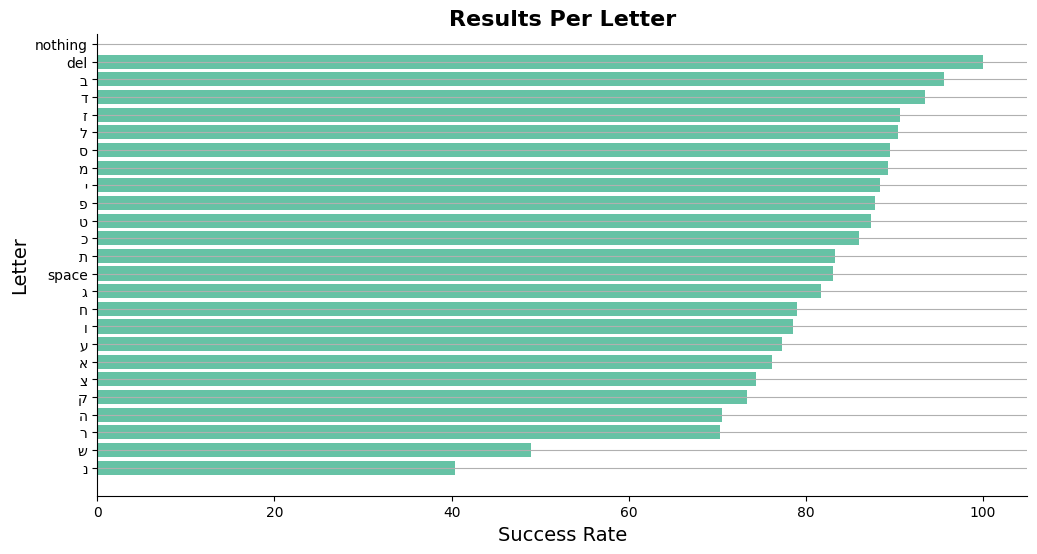

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig, ax = plt.subplots(figsize=(12,6))

# Define custom color palette
colors = sns.color_palette('Set2')

# Create the bar chart with custom colors
ax.barh(results_per_letter_df['letter'], results_per_letter_df['success rate'], color=colors[0])

# Set the x-axis label and adjust font size
ax.set_xlabel('Success Rate', fontsize=14)

# Set the y-axis label and adjust font size
ax.set_ylabel('Letter', fontsize=14)

# Set the title and adjust font size
ax.set_title('Results Per Letter', fontsize=16, fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines to the y-axis
ax.yaxis.grid(True)

# Show the plot
plt.show()


In [ ]:
def combine_csv_files(file1_path, file2_path):
    # load the first CSV file into a DataFrame
    df1 = pd.read_csv(file1_path)

    # load the second CSV file into a DataFrame
    df2 = pd.read_csv(file2_path)

    # concatenate the two DataFrames vertically
    combined_df = pd.concat([df1, df2], ignore_index=True)

    return combined_df
#test_df=combine_csv_files('/content/test1.csv','/content/test2.csv')

In [14]:
test_df.to_csv('test.csv', index=False)